## An example how to calculate sdg 11.2 indicator for Friedrichshain (Berlin)

In [1]:
import os
import sys

import pandas as pd

project_path = os.path.abspath('../')
sys.path.append(project_path)
import geopandas as gpd
from matplotlib import pyplot as plt
from ptac import accessibility as accessibility

Load stops and population data and generate boundary from population data.
The boundary is necessary to download the network afterwards.

In [2]:
stops = gpd.read_file(project_path + "/data/pt_example.gpkg")
stops_high_capacity = gpd.read_file(project_path + "/data/pt_example_high_capacity.gpkg")
stops_low_capacity = gpd.read_file(project_path + "/data/pt_example_low_capacity.gpkg")
population_points = gpd.read_file(project_path + "/data/population_example.gpkg")
boundary_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[population_points.unary_union.convex_hull])

In [5]:
population_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Plot population and pt stops

<AxesSubplot:>

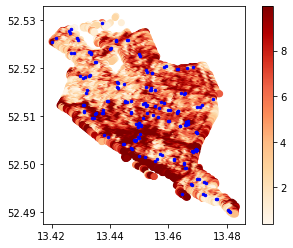

In [3]:
ax = population_points.plot(column= "pop", cmap='OrRd', legend=True)
stops.plot(color="blue", ax=ax, markersize=6)

Calculate sum of population in the focus area

In [4]:
population_sum = population_points["pop"].sum()

print(f"Overall sum of population is: {population_sum}")

Overall sum of population is: 88270.7075406313


Now calculate the accessibilities from population point data to stations

In [5]:
accessibility_output = accessibility.distance_to_closest(
    start_geometries=population_points,
    destination_geometries=stops,
    boundary_geometries=boundary_gdf,
    maximum_distance=500,
    epsg=25833,
    network_exists=True,
    verbose=5)

Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 500 m calculated in 10 seconds


Select starting points which are within 500 meters from the next station

In [6]:
sdg = accessibility.calculate_sdg(population=population_points,
                                  population_column='pop',
                                  input=accessibility_output)
print(f"{sdg} percent of the population have access to public transit stops")

Calculating SDG 11.2. indicator ... 
SDG 11.2.1 indicator is calculated
0.9574668932422128 percent of the population have access to public transit stops


Calculate sum of population with access to pt within 500 meters

In [7]:
sum_pop_with_access = accessibility_output["pop"].sum()
print(sum_pop_with_access)

84516.28011322021


Plot result as a map

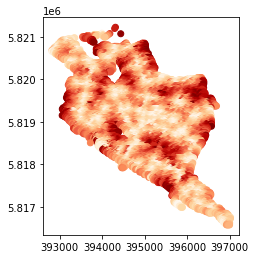

In [8]:
accessibility_output.plot(column='distance_pt', cmap='OrRd')
plt.show()

In [9]:
accessibility_output_high = accessibility.distance_to_closest(
    start_geometries=population_points,
    destination_geometries=stops_high_capacity,
    transport_system="high-capacity",
    boundary_geometries=boundary_gdf,
    epsg=25833,
    network_exists=True,
    verbose=5)

Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 1000 m calculated in 11 seconds


In [10]:
accessibility_output_low = accessibility.distance_to_closest(
    start_geometries=population_points,
    destination_geometries=stops_low_capacity,
    transport_system="low-capacity",
    boundary_geometries=boundary_gdf,
    epsg=25833,
    network_exists=True,
    verbose=5)

Starting UrMoAC to calculate accessibilities

accessibility to public transport stops within 500 m calculated in 12 seconds


Calculate the actual indicator for low- and high-capacity transport systems and print the result

In [11]:
sdg_low_high = accessibility.calculate_sdg(population=population_points,
                                           population_column='pop',
                                           input=[accessibility_output_high,
                                                  accessibility_output_low])
print(f"{sdg_low_high} percent of the population have access to low- and high-capacity public transit systems")


Calculating SDG 11.2. indicator ... 
SDG 11.2.1 indicator is calculated
0.9940747883628528 percent of the population have access to low- and high-capacity public transit systems


In [12]:
accessibility_low_high = accessibility.concat_dfs(dfs=[accessibility_output_high, accessibility_output_low])

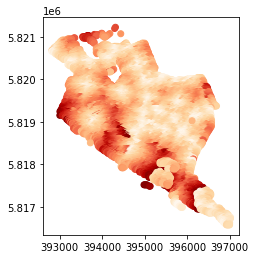

In [15]:
accessibility_low_high.plot(column='distance_pt', cmap='OrRd')
plt.show()